In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

This script is based on [this](https://d3c33hcgiwev3.cloudfront.net/_e6b9ab92bcaef99f2a96d0f08c0b51a3_lesson_03.html?Expires=1619049600&Signature=BoxJ0FB2gDXjdB6h~jJgvpVXVuehASTZnVpSiaee6PiDhNRbHAaoQZgVCpxaWRiqM1TOcuoCO5foaZcdIrB1M9BvaUtshmaeuseU-8VIU~f3Z7vY3VYngFSfb84gJpdtg8iTQplGzd1BKIRILX8IX9VD7TBWcsrt3RFEL1VVSQQ_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A).

### Monte carlo simulation 

Monte Carlo estimation refers to simulating hypothetical draws from a probability distribution in order to calculate important quantities. These quantities might include the mean, the variance, the probability of some event, or quantiles of the distribution. All of these calculations involve integration, which except for the simplest distributions, can be very difficult or impossible.

Suppose we have a random variable $\theta$ that follows:

$\theta \sim Gamma(a, b)$

$a = 2 \text{ and } b = \frac{1}{3}$

Where: 

$\mathbb{E}(\theta) = \frac{a}{b} = 6$


In [16]:
from scipy.stats import gamma

a, b = 2, 1/3 # Gamma function parameters
m = 10000 # Monte carlo sample size

# Lambda is 1/scale
rv = gamma(a, loc = 0., scale = 1/b)

If we have a random sample from a distribution, the average of those samples converges in probability to the true mean of that distribution by the Law of Large Numbers. Furthermore, by the Central Limit Theorem (CLT), this sample mean can be written as:

$ \bar{\theta}^* = \frac{1}{m}\sum_{i=1}^m \theta_i^* $

It is also possible to approximate this variance with the sample variance:

$ \hat{Var(\theta)} = \frac{1}{m}\sum_{i=1}^m (\theta_i^* - \bar{\theta}^*)^2 $

In [18]:
# sampling from gamma function
theta = rv.rvs(m)
print('The first 6 theta values are: {}'.format(theta[:6]))

The first 6 theta values are: [ 6.95464211 10.08906831  8.0512179  14.91576443  6.18135974  4.27878415]


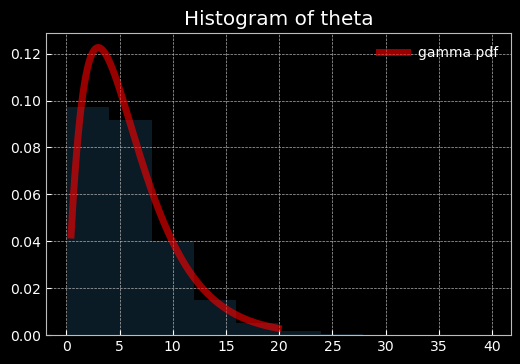

In [20]:
# Plotting the histogram of the random samples
fig, ax = plt.subplots(1, 1)
ax.hist(theta, density=True, histtype='stepfilled', alpha=0.2)
# Sampling in all the domain of the function
x = np.linspace(rv.ppf(0.01),rv.ppf(0.99), m)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='gamma pdf')
ax.legend(loc='best', frameon=False)
plt.title('Histogram of theta')
plt.show()

A monte carlo approximation to the expected value of $\theta$ is: $

In [22]:
print('The Monte carlo approximation for the mean is {}'.format(np.mean(theta)))
print('The true value for the mean is {}'.format(a / b))

The Monte carlo approximation for the mean is 5.980474582771642
The true value for the mean is 6.0


The Monte carlo approximation to the variance of $\theta$ is: 

In [24]:
print('The Monte carlo approximation for the variance is {}'.format(np.var(theta)))
print('The true value for the mean is {}'.format(a / (b**2)))

The Monte carlo approximation for the variance is 17.775810038188105
The true value for the mean is 18.0


### Calculating probabilities

One extremely useful example of an $h$ function is is the indicator $I_A(\theta)$ where $A$ is some logical condition about the value of $\theta$. To demonstrate, suppose $h(\theta)=I_{[\theta<5]}(\theta)$, which will give a 1 if $\theta < 5$ and return a 0 otherwise. What is $E(h(θ))$? This is the integral:

$ \int_0^\infty I_{[\theta<5]}(\theta) p(\theta) d\theta = \int_0^5 1 \cdot p(\theta) d\theta + \int_5^\infty 0 \cdot p(\theta) d\theta = P(\theta < 5) \, $

It means we can approximate the probability that $θ<5$ by drawing many samples $θ^∗_i$, and approximating this integral with $\frac{1}{m} \sum_{i=1}^m I_{\theta^* < 5} (\theta_i^*)$. This expression is simply counting how many of those samples come out to be less than 5, and dividing by the total number of simulated samples.


In [26]:
# Indicator variable
ind = theta < 5.0
print('The first 5 values of theta > 5 are: {}'.format(ind[:5]))
print('The first 5 values of theta are: {}'.format(theta[:5]))
print('An approximation to P(theta < 5) is: {}'.format(np.mean(ind)))
print('The true probability of P(theta < 5) is: {}'.format(rv.cdf(5)))

The first 5 values of theta > 5 are: [False False False False False]
The first 5 values of theta are: [ 6.95464211 10.08906831  8.0512179  14.91576443  6.18135974]
An approximation to P(theta < 5) is: 0.4939
The true probability of P(theta < 5) is: 0.4963317257665017


Likewise, we can approximate quantiles of a distribution. If we are looking for the value $z$ such that $P(θ<z)=0.9$, we simply arrange the samples $θ^∗_i$ in ascending order and find the smallest drawn value that is greater than $90%$ of the others.

In [28]:
q_theta = np.quantile(theta, 0.9)
print('The approximation of the 90th percentile of theta is {}'.format(q_theta))
print('The true 90th percentile of theta is {}'.format(rv.ppf(0.9)))

The approximation of the 90th percentile of theta is 11.622035450808665
The true 90th percentile of theta is 11.669160509602287


### Monte Carlo error

How good is an approximation by Monte Carlo sampling? Again we can turn to the CLT, which tells us that the variance of our estimate is controlled in part by m. For a better estimate, we want larger m.

For example, if we seek $\mathbb{E}(θ)$, then the sample mean $\hat{θ}^∗$ approximately follows a normal distribution with mean $\mathbb{E}(θ)$ and variance $\frac{Var(θ)}{m}$, therefore, $\hat{θ}^∗ \sim \mathcal{N}(\mathbb{E}(θ), \frac{Var(θ)}{m})$. The variance tells us how far our estimate might be from the true value. One way to approximate $Var(θ)$ is to replace it with the sample variance. The standard deviation of our Monte Carlo estimate is the square root of that, or the sample standard deviation divided by $\sqrt{m}$. If $m$ is large, it is reasonable to assume that the true value will likely be within about two standard deviations of your Monte Carlo estimate.

In [29]:
# Set a random seed
np.random.seed(seed = 32)

a, b = 2, 1/3 # Gamma function parameters
m = 10000 # Monte carlo sample size

# Lambda is 1/scale
rv = gamma(a, loc = 0., scale = 1/b)
# sampling from gamma function
theta = rv.rvs(m)

Recall that the standard error is:

$ \sqrt{\frac{\hat{Var}(\theta)}{m}}$

In [30]:
# Compute standard error
se = np.std(theta) / np.sqrt(m)
print('The standard error is: {}'.format(se))

The standard error is: 0.04322709073070175


To create a confidence interval for the Monte Carlo approximation. We could look at, for example, two times the standard error. That is, we are reasonably confident, about 95% confident. That the Monte Carlo estimate for the expected value of theta is no more than this far from the true value of the expected value of theta. 

In [31]:
print('A 0.95 confidecente interval for our Monte Carlo estimate is: {}\n'.format(2 * se))

print('The lower edge of the confidence interval is: {}\n'.format(np.mean(theta) - 2 * se))
print('The upper edge of the confidence interval is: {}\n'.format(np.mean(theta) + 2 * se))

# We are confident that the true mean is between the lower and upper interval showed below!

A 0.95 confidecente interval for our Monte Carlo estimate is: 0.0864541814614035

The lower edge of the confidence interval is: 6.006200987492433

The upper edge of the confidence interval is: 6.179109350415241



In [32]:
# Indicator variable
ind = theta < 5.0
ind_mean = np.mean(ind)
print('An approximation to P(theta < 5) is: {}'.format(ind_mean))
print('The true probability of P(theta < 5) is: {}'.format(rv.cdf(5)))


An approximation to P(theta < 5) is: 0.4887
The true probability of P(theta < 5) is: 0.4963317257665017


To obtain the Monte Carlo standard error for our Monte Carlo estimate. 

$ \sqrt{\frac{\hat{Var}(I)}{m}}$

In [33]:
se = np.std(ind) / np.sqrt(m)
print('The standard error of the indicator is: {}'.format(se))

print('A 0.95 confidecente interval for our Monte Carlo estimate is: {}\n'.format(2 * se))

print('The lower edge of the confidence interval is: {}\n'.format(ind_mean - 2 * se))
print('The upper edge of the confidence interval is: {}\n'.format(ind_mean + 2 * se))

The standard error of the indicator is: 0.004998722936910987
A 0.95 confidecente interval for our Monte Carlo estimate is: 0.009997445873821974

The lower edge of the confidence interval is: 0.47870255412617807

The upper edge of the confidence interval is: 0.498697445873822



### Example with Hierarchical model

We can also obtain Monte Carlo samples from hierarchical models. As a simple example, let’s consider a binomial random variable where $y∣ϕ∼Bin(10,ϕ)$, and further suppose $ϕ$ is random (as if it had a prior) and is distributed beta $ϕ∼Beta(2,2)$. Given any hierarchical model, we can always write the joint distribution of $y$ and $ϕ$ as $p(y,ϕ)=p(y∣ϕ)p(ϕ)$ using the chain rule of probability. To simulate from this joint distribution, repeat these steps for a large number $m$:

1. Simulate $ϕ^∗_i$ from its $Beta(2,2)$ distribution.
2. Given the drawn $ϕ^∗_i$, simulate $y^∗_i$ from $Bin(10,ϕ^∗_i)$.

This will produce m independent pairs of $(y^∗,ϕ^∗)_i$ drawn from their joint distribution. One major advantage of Monte Carlo simulation is that marginalizing is easy. Calculating the marginal distribution of p(y) = \int_0^1 p(y, \phi) d\phi, might be challenging. But if we have draws from the joint distribution, we can just discard the $ϕ^∗_i$ draws and use the $y^∗_i$ as samples from their marginal distribution. This is also called the prior predictive distribution

In [34]:
from scipy.stats import beta
from scipy.stats import binom

# Params binomial 
n = 10
# Params for betta
a, b = 2, 2

# Total draws 10000
m = int(1e5)

# Beta object
rv_beta = beta(a, b)

In [35]:
# Step 1, draw samples from beta distribution
theta = rv_beta.rvs(m)
# Step 2, draw samples from binomial using draws from beta
rv_bin = binom(n, theta)
y_star = rv_bin.rvs(m)
print('The first 5 samples of theta are: {}'.format(theta[:5]))
print('The first 5 samples of y star are: {}'.format(y_star[:5]))

The first 5 samples of theta are: [0.32952162 0.15608715 0.32379823 0.59441233 0.48888113]
The first 5 samples of y star are: [4 2 9 8 6]


No handles with labels found to put in legend.


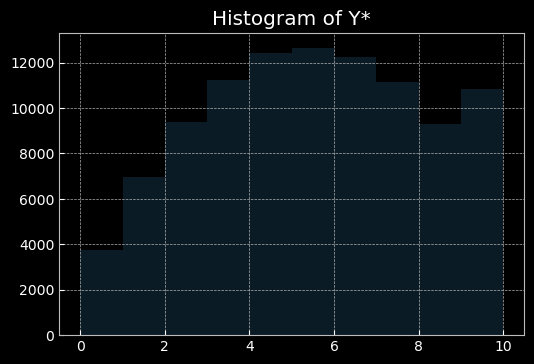

In [36]:
# Plotting the histogram of the random samples
fig, ax = plt.subplots(1, 1)
ax.hist(y_star, density=False, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.title('Histogram of Y*')
plt.show()

In [37]:
# Count events
unique, counts = np.unique(y_star, return_counts=True)
print(dict(zip(unique, counts)))

{0: 3759, 1: 6974, 2: 9403, 3: 11251, 4: 12407, 5: 12660, 6: 12237, 7: 11162, 8: 9304, 9: 7016, 10: 3827}


In [38]:
# To obtain the probabilities, divide the counts per m
p_counts = counts / m
print(dict(zip(unique, p_counts)))
print('The sum of all probabilies is: {}'.format(np.sum(p_counts)))

{0: 0.03759, 1: 0.06974, 2: 0.09403, 3: 0.11251, 4: 0.12407, 5: 0.1266, 6: 0.12237, 7: 0.11162, 8: 0.09304, 9: 0.07016, 10: 0.03827}
The sum of all probabilies is: 1.0


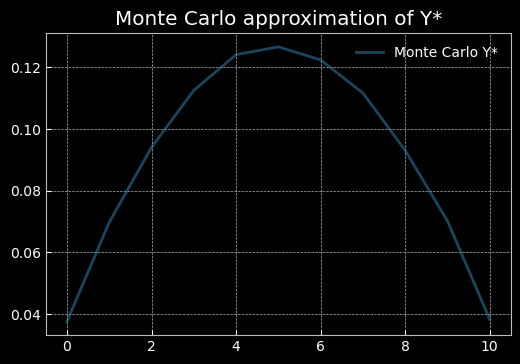

In [39]:
# Plotting the marginal distribution of y*
fig, ax = plt.subplots(1, 1)
ax.plot(p_counts, alpha=0.5, label = 'Monte Carlo Y*')
ax.legend(loc='best', frameon=False)
plt.title('Monte Carlo approximation of Y*')
plt.show()

In [40]:
# The marginal expected value of Y
print('The marginal expected value of Y* is: {}'.format(np.mean(y_star)))

The marginal expected value of Y* is: 4.99863
